In [40]:
import pandas as pd
import numpy as np
from io import StringIO
Train = pd.read_csv("Data/train.csv")
Test = pd.read_csv("Data/test.csv")

In [41]:
Train.drop('apache_2_bodysystem', axis=1, inplace=True)
Test.drop('apache_2_bodysystem', axis=1, inplace=True)

In [42]:
# fill null values with median for temp_apache
Train['temp_apache'].fillna(Train['temp_apache'].median(), inplace=True)

# fill null values with median for d1_potassium_max
Train['d1_potassium_max'].fillna(Train['d1_potassium_max'].median(), inplace=True)

# fill null values with median for apache_4a_hospital_death_prob
Train['apache_4a_hospital_death_prob'].fillna(Train['apache_4a_hospital_death_prob'].median(), inplace=True)

# fill null values with median for apache_4a_icu_death_prob
Train['apache_4a_icu_death_prob'].fillna(Train['apache_4a_icu_death_prob'].median(), inplace=True)
#since all these r heavily skewed andaffected by the outliers we will fill them using median imputation

Test['temp_apache'].fillna(Test['temp_apache'].median(), inplace=True)

# fill null values with median for d1_potassium_max
Test['d1_potassium_max'].fillna(Test['d1_potassium_max'].median(), inplace=True)

# fill null values with median for apache_4a_hospital_death_prob
Test['apache_4a_hospital_death_prob'].fillna(Test['apache_4a_hospital_death_prob'].median(), inplace=True)

# fill null values with median for apache_4a_icu_death_prob
Test['apache_4a_icu_death_prob'].fillna(Test['apache_4a_icu_death_prob'].median(), inplace=True)
# group the dataframe by apache_2_bodysystem and calculate the mean age for each group
mean_age_by_bodysystem = Train.groupby('apache_3j_bodysystem')['age'].mean()

# define a function that takes a row of the dataframe as input and returns the mean age of the corresponding apache_2_bodysystem
def fill_age(row):
    if pd.isnull(row['age']):
        if pd.isnull(row['apache_3j_bodysystem']):
            return np.nan
        else:
            return mean_age_by_bodysystem[row['apache_3j_bodysystem']]
    else:
        return row['age']

# apply the function to each row of the dataframe and fill the missing age values with the corresponding mean age
Train['age'] = Train.apply(fill_age, axis=1)

# group the dataframe by apache_2_bodysystem and calculate the mean age for each group
mean_age_by_bodysystem = Test.groupby('apache_3j_bodysystem')['age'].mean()

# define a function that takes a row of the dataframe as input and returns the mean age of the corresponding apache_2_bodysystem
def fill_age(row):
    if pd.isnull(row['age']):
        if pd.isnull(row['apache_3j_bodysystem']):
            return np.nan
        else:
            return mean_age_by_bodysystem[row['apache_3j_bodysystem']]
    else:
        return row['age']

# apply the function to each row of the dataframe and fill the missing age values with the corresponding mean age
Test['age'] = Test.apply(fill_age, axis=1)

#for all binary columns we will apply mode imputation for missing values
#first we will create a list of all binary columns
binary_colsTest = ['elective_surgery', 'apache_post_operative', 'gcs_unable_apache', 'intubated_apache', 'ventilated_apache','immunosuppression', 'solid_tumor_with_metastasis']

binary_colsTrain = ['elective_surgery', 'apache_post_operative', 'gcs_unable_apache', 'intubated_apache', 'ventilated_apache','immunosuppression', 'solid_tumor_with_metastasis','hospital_death']
#now we will apply mode imputation on these columns
from sklearn.impute import SimpleImputer
binary_colsTest = [col for col in Train.columns if Train[col].dtype == 'object' or col in binary_colsTest]
binary_colsTrain = [col for col in Test.columns if Test[col].dtype == 'object' or col in binary_colsTrain]

imputer = SimpleImputer(strategy='most_frequent')
Train[binary_colsTrain] = imputer.fit_transform(Train[binary_colsTrain])
Test[binary_colsTest] = imputer.fit_transform(Test[binary_colsTest])

numeric_cols = [col for col in Train.select_dtypes(include=[np.number]).columns if col not in binary_colsTrain]
numeric_colsTest = [col for col in Test.select_dtypes(include=[np.number]).columns if col not in binary_colsTrain]

from sklearn.impute import KNNImputer

# create an instance of KNNImputer with k=5
imputer = KNNImputer(n_neighbors=5)

# fill missing values in Train dataframe
Train[numeric_cols] = imputer.fit_transform(Train[numeric_cols])

# fill missing values in Test dataframe
Test[numeric_colsTest] = imputer.fit_transform(Test[numeric_colsTest])

In [43]:
Train.head()

,RecordID,hospital_id,icu_id,ethnicity,gender,icu_admit_source,icu_stay_type,icu_type,apache_3j_bodysystem,age,...,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,d1_glucose_max,d1_potassium_max,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,immunosuppression,solid_tumor_with_metastasis,hospital_death
0,1.0,126.0,1931.0,Caucasian,M,Floor,transfer,Med-Surg ICU,Metabolic,28.0,...,86.0,93.0,86.0,142.2,4.1,0.01,0.00,0,0,0.0
1,2.0,112.0,1544.0,African American,M,Accident & Emergency,admit,Med-Surg ICU,Cardiovascular,69.0,...,95.0,95.0,95.0,333.0,3.7,0.05,0.02,0,0,0.0
2,3.0,153.0,1517.0,Caucasian,M,Floor,admit,MICU,Respiratory,84.0,...,162.0,174.0,162.0,160.0,4.2,0.38,0.15,0,0,0.0
3,4.0,109.0,1811.0,Caucasian,M,Accident & Emergency,admit,Med-Surg ICU,Neurological,59.0,...,140.0,163.0,140.0,258.0,3.8,0.12,0.06,0,0,0.0
4,5.0,287.0,1845.0,Caucasian,F,Accident & Emergency,admit,CSICU,Cardiovascular,85.0,...,119.0,119.0,119.0,110.0,3.9,0.15,0.07,0,0,0.0


In [44]:
from sklearn.naive_bayes import CategoricalNB
from sklearn.preprocessing import LabelEncoder

In [45]:
columns=['ethnicity', 'gender', 'icu_admit_source', 'icu_stay_type', 'icu_type', 'apache_3j_bodysystem']

In [46]:
#apply label encoding on all catoegircal columns
le = LabelEncoder()
for col in columns:
    Train[col] = le.fit_transform(Train[col])

In [74]:
#apply label encoding on all catoegircal columns
le = LabelEncoder()
for col in columns:
    Test[col] = le.fit_transform(Test[col])

In [75]:
Test[columns].head()

,ethnicity,gender,icu_admit_source,icu_stay_type,icu_type,apache_3j_bodysystem
0,2,0,0,0,0,0
1,5,1,0,0,6,7
2,2,1,1,2,1,0
3,5,0,0,0,5,7
4,0,0,0,0,0,8


In [53]:
binary_colsTrain


['ethnicity',
 'gender',
 'icu_admit_source',
 'icu_stay_type',
 'icu_type',
 'apache_3j_bodysystem',
 'elective_surgery',
 'apache_post_operative',
 'gcs_unable_apache',
 'intubated_apache',
 'ventilated_apache',
 'immunosuppression',
 'solid_tumor_with_metastasis']

In [54]:
def convert_categorical(Train):
    df_q = pd.DataFrame()
    label_encoder = LabelEncoder()
    for col in Train:
        if col not in columns and col not in binary_colsTrain:
            df_q[col] = pd.qcut(Train[col], 5, duplicates='drop')            
            df_q[col]= label_encoder.fit_transform(df_q[col])
            df_q[col] = df_q[col].astype('str')

    X_cat = Train[binary_colsTrain]
    df_cat = pd.concat([df_q,X_cat],axis=1)
    return df_cat

 
temp_df1 = convert_categorical(Train) 
temp_df1.head()

,RecordID,hospital_id,icu_id,age,pre_icu_los_days,apache_2_diagnosis,apache_3j_diagnosis,gcs_eyes_apache,gcs_motor_apache,gcs_verbal_apache,...,icu_stay_type,icu_type,apache_3j_bodysystem,elective_surgery,apache_post_operative,gcs_unable_apache,intubated_apache,ventilated_apache,immunosuppression,solid_tumor_with_metastasis
0,0,1,4,0,0,2,3,0,1,1,...,2,5,5,0,0,0.0,0,0,0,0
1,0,0,2,3,1,3,0,1,1,1,...,0,5,0,0,0,0.0,0,0,0,0
2,0,1,2,4,4,0,1,0,0,1,...,0,4,8,0,0,0.0,0,1,0,0
3,0,0,4,1,2,3,2,1,1,1,...,0,5,7,0,0,0.0,0,0,0,0
4,0,4,4,4,1,1,0,1,1,1,...,0,1,0,0,0,0.0,0,1,0,0


In [55]:
temp_df1.dtypes

RecordID                         object
hospital_id                      object
icu_id                           object
age                              object
pre_icu_los_days                 object
apache_2_diagnosis               object
apache_3j_diagnosis              object
gcs_eyes_apache                  object
gcs_motor_apache                 object
gcs_verbal_apache                object
heart_rate_apache                object
resprate_apache                  object
temp_apache                      object
d1_diasbp_min                    object
d1_diasbp_noninvasive_min        object
d1_heartrate_max                 object
d1_mbp_min                       object
d1_mbp_noninvasive_min           object
d1_resprate_max                  object
d1_spo2_min                      object
d1_sysbp_min                     object
d1_sysbp_noninvasive_min         object
d1_temp_min                      object
h1_diasbp_min                    object
h1_diasbp_noninvasive_min        object


In [56]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import roc_curve, roc_auc_score

In [57]:
def fit_model(model, model_name):
    model.fit(trainX,trainy)
    md_probs = model.predict_proba(testX)
    md_probs = md_probs[:,1]
    md_auc = roc_auc_score(testy, md_probs)
    print(model_name, " : ", md_auc)
    md_fpr, md_tpr, _ = roc_curve(testy, md_probs)
    pyplot.plot(md_fpr, md_tpr, marker='.', label=model_name)
    #return (md_fpr, md_tpr)

Naive Bayes Categorical  :  0.8442497481654616


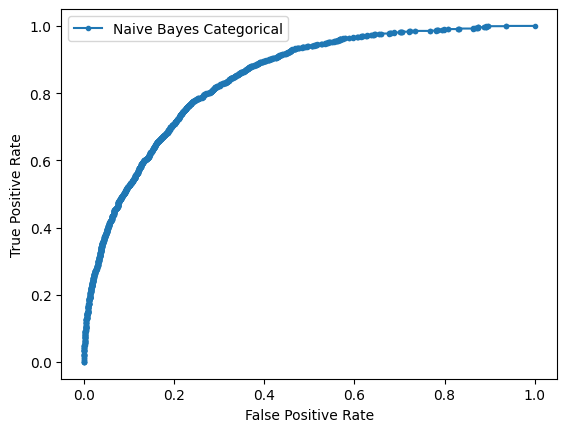

In [151]:
from matplotlib import pyplot
X_cat = convert_categorical(Train.loc[:,Train.columns!='hospital_death'])
y=Train['hospital_death']
trainX, testX, trainy, testy = train_test_split(X_cat, y, test_size=0.3, random_state=2)
nb_c = CategoricalNB(alpha=550)
fit_model(nb_c, "Naive Bayes Categorical")

pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()


In [95]:
X_cat.shape

(50000, 56)

In [106]:
CATTEST.columns

Index(['RecordID', 'hospital_id', 'icu_id', 'age', 'pre_icu_los_days',
       'apache_2_diagnosis', 'apache_3j_diagnosis', 'gcs_eyes_apache',
       'gcs_motor_apache', 'gcs_verbal_apache', 'heart_rate_apache',
       'resprate_apache', 'temp_apache', 'd1_diasbp_min',
       'd1_diasbp_noninvasive_min', 'd1_heartrate_max', 'd1_mbp_min',
       'd1_mbp_noninvasive_min', 'd1_resprate_max', 'd1_spo2_min',
       'd1_sysbp_min', 'd1_sysbp_noninvasive_min', 'd1_temp_min',
       'h1_diasbp_min', 'h1_diasbp_noninvasive_min', 'h1_heartrate_max',
       'h1_heartrate_min', 'h1_mbp_max', 'h1_mbp_min',
       'h1_mbp_noninvasive_max', 'h1_mbp_noninvasive_min', 'h1_resprate_max',
       'h1_resprate_min', 'h1_spo2_max', 'h1_spo2_min', 'h1_sysbp_max',
       'h1_sysbp_min', 'h1_sysbp_noninvasive_max', 'h1_sysbp_noninvasive_min',
       'd1_glucose_max', 'd1_potassium_max', 'apache_4a_hospital_death_prob',
       'apache_4a_icu_death_prob', 'ethnicity', 'gender', 'icu_admit_source',
       'icu_sta

In [147]:
# Assuming that 'Test' is your test DataFrame
CATTEST = convert_categorical(Test)

hospital_death_prob = nb_c.predict_proba(CATTEST)
# The predicted probabilities of each class are stored in the second column of the output array
hospital_death = hospital_death_prob[:, 1]


In [148]:
predictions_df = pd.DataFrame(hospital_death, columns=['hospital_death'])


In [152]:
# Create a DataFrame for the predictions
# predictions_df = pd.DataFrame(hosp, columns=['hospital_death'])
# Add the record ID from the test data to the predictions DataFrame
predictions_df.insert(0, 'RecordID', Test['RecordID'])

# Save the predictions to a CSV file
predictions_df.to_csv('predictionsCategorical.csv', index=False)

In [119]:
predictions_df.head()

,RecordID,hospital_death
0,50001.0,1.000000
1,50002.0,0.005074
2,50003.0,0.981028
3,50004.0,0.999972
4,50005.0,0.828531


In [87]:
Train['age'] = pd.cut(Train['age'], bins=[0, 20, 40, 60, 80, 100], labels=['0-20', '20-40', '40-60', '60-80', '80-100'])
Test['age'] = pd.cut(Test['age'], bins=[0, 20, 40, 60, 80, 100], labels=['0-20', '20-40', '40-60', '60-80', '80-100'])

In [88]:
Train['age']

0         20-40
1         60-80
2        80-100
3         40-60
4        80-100
          ...  
49995     40-60
49996     60-80
49997     40-60
49998     40-60
49999    80-100
Name: age, Length: 50000, dtype: category
Categories (5, object): ['0-20' < '20-40' < '40-60' < '60-80' < '80-100']

In [89]:
#binning for hospital_id
Train['hospital_id'] = pd.cut(Train['hospital_id'], bins=[0, 50, 100, 150, 200, 250,300], labels=['0-50', '50-100', '100-150', '150-200', '200-250','250-300'])
Test['hospital_id'] = pd.cut(Test['hospital_id'], bins=[0, 50, 100, 150, 200, 250,300], labels=['0-50', '50-100', '100-150', '150-200', '200-250','250-300'])


In [90]:
# apply binning for icu_id
Train['icu_id'] = pd.cut(Train['icu_id'], bins=[0, 999, 1200, 1400, 2000], labels=['<1000', '1000-1200', '1200-1400', '1400-2000'])
Test['icu_id'] = pd.cut(Test['icu_id'], bins=[0, 999, 1200, 1400, 2000], labels=['<1000', '1000-1200', '1200-1400', '1400-2000'])


In [91]:
#do for pre_icu_los_days with range 0-20 and in to 5-5 groups
Train['pre_icu_los_days'] = pd.cut(Train['pre_icu_los_days'], bins=[0, 5, 10, 15, 20], labels=[1, 2, 3, 4])
Test['pre_icu_los_days'] = pd.cut(Test['pre_icu_los_days'], bins=[0, 5, 10, 15, 20], labels=[1, 2, 3, 4])
#do for apache_2_diagnosis but use qunatile binning for this its range is 0-300
Train['apache_2_diagnosis'] = pd.qcut(Train['apache_2_diagnosis'], q=4, labels=[1, 2, 3, 4])
Test['apache_2_diagnosis'] = pd.qcut(Test['apache_2_diagnosis'], q=4, labels=[1, 2, 3, 4])
#do for heart_rate_apache range is 0-180 break in to 40-40 groups
Train['heart_rate_apache'] = pd.cut(Train['heart_rate_apache'], bins=[0, 40, 80, 120, 160, 200], labels=[1, 2, 3, 4, 5])
Test['heart_rate_apache'] = pd.cut(Test['heart_rate_apache'], bins=[0, 40, 80, 120, 160, 200], labels=[1, 2, 3, 4, 5])
#do for resprate_apache range is 0-60 break in to 20-20 groups
Train['resprate_apache'] = pd.cut(Train['resprate_apache'], bins=[0, 20, 40, 60], labels=[1, 2, 3])
Test['resprate_apache'] = pd.cut(Test['resprate_apache'], bins=[0, 20, 40, 60], labels=[1, 2, 3])


In [92]:
#do for temp_apache range is 30-40 break in to 4 groups
Train['temp_apache'] = pd.cut(Train['temp_apache'], bins=[30, 32, 34, 36, 38, 40], labels=[1, 2, 3, 4, 5])
Test['temp_apache']= pd.cut(Test['temp_apache'], bins=[30, 32, 34, 36, 38, 40], labels=[1, 2, 3, 4, 5])
#do same for d1_diasbp_min ranfe is 10-90 break into 5 groups
Train['d1_diasbp_min'] = pd.cut(Train['d1_diasbp_min'], bins=[10, 30, 50, 70, 90], labels=[1, 2, 3, 4])
Test['d1_diasbp_min'] = pd.cut(Test['d1_diasbp_min'], bins=[10, 30, 50, 70, 90], labels=[1, 2, 3, 4])
#do same for d1_diasbp_noninvasive_min ranfe is 10-90 break into 5 groups
Train['d1_diasbp_noninvasive_min'] = pd.cut(Train['d1_diasbp_noninvasive_min'], bins=[10, 30, 50, 70, 90], labels=[1, 2, 3, 4])
Test['d1_diasbp_noninvasive_min'] = pd.cut(Test['d1_diasbp_noninvasive_min'], bins=[10, 30, 50, 70, 90], labels=[1, 2, 3, 4])



In [93]:
col_Bin=['d1_heartrate_max', 'd1_mbp_min', 'd1_mbp_noninvasive_min',
'd1_resprate_max', 'd1_spo2_min', 'd1_sysbp_min',
'd1_sysbp_noninvasive_min', 'd1_temp_min', 'h1_diasbp_min',
'h1_diasbp_noninvasive_min', 'h1_heartrate_max', 'h1_heartrate_min',
'h1_mbp_max', 'h1_mbp_min', 'h1_mbp_noninvasive_max',
'h1_mbp_noninvasive_min', 'h1_resprate_max', 'h1_resprate_min',
'h1_spo2_max', 'h1_spo2_min', 'h1_sysbp_max', 'h1_sysbp_min',
'h1_sysbp_noninvasive_max', 'h1_sysbp_noninvasive_min',
'd1_glucose_max', 'd1_potassium_max', 'apache_4a_hospital_death_prob',
'apache_4a_icu_death_prob']

Train['d1_heartrate_max'] = pd.cut(Train['d1_heartrate_max'], bins=[30, 60, 90, 120, 150, 180], labels=[1, 2, 3, 4, 5])
Test['d1_heartrate_max'] = pd.cut(Test['d1_heartrate_max'],  bins=[30, 60, 90, 120, 150, 180], labels=[1, 2, 3, 4, 5])

In [94]:
#do for d1_mbp_min range is 20-150 break in to 5 groups
Train['d1_mbp_min'] = pd.cut(Train['d1_mbp_min'], bins=[20, 50, 80, 110, 140, 170], labels=[1, 2, 3, 4, 5])
Test['d1_mbp_min'] = pd.cut(Test['d1_mbp_min'], bins=[20, 50, 80, 110, 140, 170], labels=[1, 2, 3, 4, 5])
#do for d1_mbp_noninvasive_min range is 20-150 break in to 5 groups
Train['d1_mbp_noninvasive_min'] = pd.cut(Train['d1_mbp_noninvasive_min'], bins=[20, 50, 80, 110, 140, 170], labels=[1, 2, 3, 4, 5])
Test['d1_mbp_noninvasive_min'] = pd.cut(Test['d1_mbp_noninvasive_min'], bins=[20, 50, 80, 110, 140, 170], labels=[1, 2, 3, 4, 5])
#do for d1_sysbp_min range is 40-160 break in to 5 groups
Train['d1_sysbp_min'] = pd.cut(Train['d1_sysbp_min'], bins=[40, 70, 100, 130, 160, 190], labels=[1, 2, 3, 4, 5])
Test['d1_sysbp_min'] = pd.cut(Test['d1_sysbp_min'], bins=[40, 70, 100, 130, 160, 190], labels=[1, 2, 3, 4, 5])
#do for d1_sysbp_noninvasive_min range is 40-160 break in to 5 groups
Train['d1_sysbp_noninvasive_min'] = pd.cut(Train['d1_sysbp_noninvasive_min'], bins=[40, 70, 100, 130, 160, 190], labels=[1, 2, 3, 4, 5])
Test['d1_sysbp_noninvasive_min'] = pd.cut(Test['d1_sysbp_noninvasive_min'], bins=[40, 70, 100, 130, 160, 190], labels=[1, 2, 3, 4, 5])


In [95]:
#do for h1_diasbp_min range is 20-150 break in to 5 groups
Train['h1_diasbp_min'] = pd.cut(Train['h1_diasbp_min'], bins=[20, 50, 80, 110, 140, 170], labels=[1, 2, 3, 4, 5])
Test['h1_diasbp_min'] = pd.cut(Test['h1_diasbp_min'], bins=[20, 50, 80, 110, 140, 170], labels=[1, 2, 3, 4, 5])
#do for h1_diasbp_noninvasive_min range is 20-150 break in to 5 groups
Train['h1_diasbp_noninvasive_min'] = pd.cut(Train['h1_diasbp_noninvasive_min'], bins=[20, 50, 80, 110, 140, 170], labels=[1, 2, 3, 4, 5])
Test['h1_diasbp_noninvasive_min'] = pd.cut(Test['h1_diasbp_noninvasive_min'], bins=[20, 50, 80, 110, 140, 170], labels=[1, 2, 3, 4, 5])
#do for h1_mbp_max range is 30-170 break in to 5 groups
Train['h1_mbp_max'] = pd.cut(Train['h1_mbp_max'], bins=[30, 70, 100, 130, 160, 190], labels=[1, 2, 3, 4, 5])
Test['h1_mbp_max'] = pd.cut(Test['h1_mbp_max'], bins=[30, 70, 100, 130, 160, 190], labels=[1, 2, 3, 4, 5])
#do for h1_mbp_min range is 20-140 break in to 5 groups
Train['h1_mbp_min'] = pd.cut(Train['h1_mbp_min'], bins=[20, 50, 80, 110, 140, 170], labels=[1, 2, 3, 4, 5])
Test['h1_mbp_min'] = pd.cut(Test['h1_mbp_min'], bins=[20, 50, 80, 110, 140, 170], labels=[1, 2, 3, 4, 5])
#do for h1_mbp_noninvasive_max range is 30-170 break in to 5 groups
Train['h1_mbp_noninvasive_max'] = pd.cut(Train['h1_mbp_noninvasive_max'], bins=[30, 70, 100, 130, 160, 190], labels=[1, 2, 3, 4, 5])
Test['h1_mbp_noninvasive_max'] = pd.cut(Test['h1_mbp_noninvasive_max'], bins=[30, 70, 100, 130, 160, 190], labels=[1, 2, 3, 4, 5])
#do for h1_mbp_noninvasive_min range is 20-140 break in to 5 groups
Train['h1_mbp_noninvasive_min'] = pd.cut(Train['h1_mbp_noninvasive_min'], bins=[20, 50, 80, 110, 140, 170], labels=[1, 2, 3, 4, 5])
Test['h1_mbp_noninvasive_min'] = pd.cut(Test['h1_mbp_noninvasive_min'], bins=[20, 50, 80, 110, 140, 170], labels=[1, 2, 3, 4, 5])


In [96]:
#do for h1_sysbp_max range is 60-240 break in to 5 groups
Train['h1_sysbp_max'] = pd.cut(Train['h1_sysbp_max'], bins=[60, 100, 140, 180, 220, 260], labels=[1, 2, 3, 4, 5])
Test['h1_sysbp_max'] = pd.cut(Test['h1_sysbp_max'], bins=[60, 100, 140, 180, 220, 260], labels=[1, 2, 3, 4, 5])
#do for h1_sysbp_min range is 40-200 break in to 5 groups
Train['h1_sysbp_min'] = pd.cut(Train['h1_sysbp_min'], bins=[40, 80, 120, 160, 200, 240], labels=[1, 2, 3, 4, 5])
Test['h1_sysbp_min'] = pd.cut(Test['h1_sysbp_min'], bins=[40, 80, 120, 160, 200, 240], labels=[1, 2, 3, 4, 5])
#do for h1_sysbp_noninvasive_max range is 60-240 break in to 5 groups
Train['h1_sysbp_noninvasive_max'] = pd.cut(Train['h1_sysbp_noninvasive_max'], bins=[60, 100, 140, 180, 220, 260], labels=[1, 2, 3, 4, 5])
Test['h1_sysbp_noninvasive_max'] = pd.cut(Test['h1_sysbp_noninvasive_max'], bins=[60, 100, 140, 180, 220, 260], labels=[1, 2, 3, 4, 5])
#do for h1_sysbp_noninvasive_min range is 40-200 break in to 5 groups
Train['h1_sysbp_noninvasive_min'] = pd.cut(Train['h1_sysbp_noninvasive_min'], bins=[40, 80, 120, 160, 200, 240], labels=[1, 2, 3, 4, 5])
Test['h1_sysbp_noninvasive_min'] = pd.cut(Test['h1_sysbp_noninvasive_min'], bins=[40, 80, 120, 160, 200, 240], labels=[1, 2, 3, 4, 5])


In [97]:
labels = '1', '2', '3'
Train['d1_temp_min']  = pd.qcut(Train['d1_temp_min'], len(labels), labels=labels)
Test['d1_temp_min']  = pd.qcut(Test['d1_temp_min'], len(labels), labels=labels)


In [98]:
Train['h1_resprate_max'] = pd.qcut(Train['h1_resprate_max'], len(labels), labels=labels)
Test['h1_resprate_max'] = pd.qcut(Test['h1_resprate_max'], len(labels), labels=labels)


In [99]:
#do for d1_resprate_max range is 0-60 break in to 5 groups but use quanitle binning
Train['d1_resprate_max'] = pd.qcut(Train['d1_resprate_max'], len(labels), labels=labels)
Test['d1_resprate_max'] = pd.qcut(Test['d1_resprate_max'], len(labels), labels=labels)
#do for d1_spo2_min range is 0-100 break in to 5 groups but use quanitle binning
Train['d1_spo2_min'] = pd.qcut(Train['d1_spo2_min'], len(labels), labels=labels)
Test['d1_spo2_min'] = pd.qcut(Test['d1_spo2_min'], len(labels), labels=labels)

In [100]:
labels = '1', '2', '3'
Train['h1_resprate_max']  = pd.qcut(Train['h1_resprate_max'], len(labels), labels=labels)
Test['h1_resprate_max']  = pd.qcut(Test['h1_resprate_max'], len(labels), labels=labels)


TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [102]:
#drop missing values
Train.dropna(inplace=True)


In [103]:
#in test['pre_icu_los_days'] there is a missing value fill it with mode
Test['pre_icu_los_days'].fillna(Test['pre_icu_los_days'].mode()[0], inplace=True)

In [106]:
#only show columns that hvae missing values
Test.isnull().sum()

RecordID                         0
hospital_id                      0
icu_id                           0
ethnicity                        0
gender                           0
icu_admit_source                 0
icu_stay_type                    0
icu_type                         0
apache_2_bodysystem              0
age                              0
elective_surgery                 0
pre_icu_los_days                 0
apache_2_diagnosis               0
apache_3j_diagnosis              0
apache_post_operative            0
gcs_eyes_apache                  0
gcs_motor_apache                 0
gcs_unable_apache                0
gcs_verbal_apache                0
heart_rate_apache                0
intubated_apache                 0
resprate_apache                  0
temp_apache                      0
ventilated_apache                0
d1_diasbp_min                    0
d1_diasbp_noninvasive_min        0
d1_heartrate_max                 0
d1_mbp_min                       0
d1_mbp_noninvasive_m

In [73]:
# drop columns that contain missing values
Test.dropna(axis=1, inplace=True)


In [107]:
#now i want to use CategoricalNB
#first i will convert all columns to categorical
Train = Train.astype('category')
Test = Test.astype('category')

In [108]:
#now i will convert all categorical columns to numerical
Train = Train.apply(lambda x: x.cat.codes)
Test = Test.apply(lambda x: x.cat.codes)
#now i will exclude the 'hospital_death' column and split the data
X = Train.loc[:, Train.columns != 'hospital_death']
y = Train['hospital_death']



(0,)

In [110]:
#now split x and y into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=2)


In [119]:
# make sure that X and y are of same size, remove all isntnaces where they do not match
X_train = X_train[X_train.index.isin(y_train.index)]
y_train = y_train[y_train.index.isin(X_train.index)]
#do same for test
X_test = X_test[X_test.index.isin(y_test.index)]
y_test = y_test[y_test.index.isin(X_test.index)]



In [126]:
# now run a categorical NB
from sklearn.naive_bayes import CategoricalNB
model = CategoricalNB()
model.fit(X_train, y_train)

# print the shape of X_train and X_test
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

# remove extra columns from X_train or add missing columns to X_test
X_train = X_train[:, :X_test.shape[1]]

y_pred = model.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


X_train shape: (33416, 56)
X_test shape: (14322, 56)


InvalidIndexError: (slice(None, None, None), slice(None, 56, None))